In [2]:
import sys
import os
import os.path as osp

import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv
import argparse

import torch
from torch.utils import data
import torch.nn.functional as F
from torch.utils.data import DataLoader

# sys.path.insert(1, os.path.join(sys.path[0], '..'))
import datasets
from datasets import build_dataset
import util.misc as utils
from config import cfg

In [3]:
def get_args_parser():
    parser = argparse.ArgumentParser('Set gptran', add_help=False)
    parser.add_argument('--config-file', 
                        metavar="FILE",
                        help="path to config file",
                        type=str,
                        default='config-files/gptran.yaml')
    parser.add_argument("--opts",
                        help="Modify config options using the command-line",
                        default=None,
                        nargs=argparse.REMAINDER)
    return parser

args = get_args_parser().parse_args(args=[])
cfg.merge_from_file(args.config_file)
# cfg.merge_from_list(args.opts)

In [4]:
dataset_test = build_dataset(image_set='test', cfg=cfg)
sampler_test = torch.utils.data.SequentialSampler(dataset_test)
data_loader_test = DataLoader(dataset_test, 1, sampler=sampler_test,
                             drop_last=False, 
                             collate_fn=utils.collate_fn, 
                             num_workers=2)

In [6]:
img, extra, target = dataset_test[0]
print(target.keys())

dict_keys(['rp', 'fovy', 'up_vector', 'focal', 'zvp', 'hl', 'vert_segs', 'vert_lines', 'vert_seg_mask', 'org_img', 'org_sz', 'input_sz', 'img_path', 'filename'])


128.0


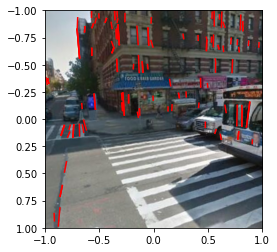

In [7]:
# img_np = img.numpy().transpose(1,2,0)
img_np = target['org_img']
vsegs_np = target['vert_segs'].numpy()
vsegs_mask_np = target['vert_seg_mask'].numpy()
print(vsegs_mask_np.sum())

plt.imshow(img_np, extent=[-1, 1, 1, -1])
plt.plot([vsegs_np[:,0], vsegs_np[:,2]],
         [vsegs_np[:,1], vsegs_np[:,3]], '-r')
plt.show()

In [11]:
print(np.cos(np.radians(90)))
print(np.cos(np.radians(88)))
print(np.cos(np.radians(85)))

6.123233995736766e-17
0.03489949670250108
0.08715574274765814
